Create a logistic regression model  on social network ads.csv to perform classification on given dataset. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall .

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Prepare the features (X) and target variable (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
#X = data.iloc[:, [2, 3]].values  # Age and EstimatedSalary as features
#y = data.iloc[:, 4].values  # Purchased as target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute error rate
error_rate = 1 - accuracy

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[50  2]
 [ 7 21]]
Accuracy: 0.8875
Error Rate: 0.11250000000000004
Precision: 0.9130434782608695
Recall: 0.75
F1-score: 0.8235294117647058


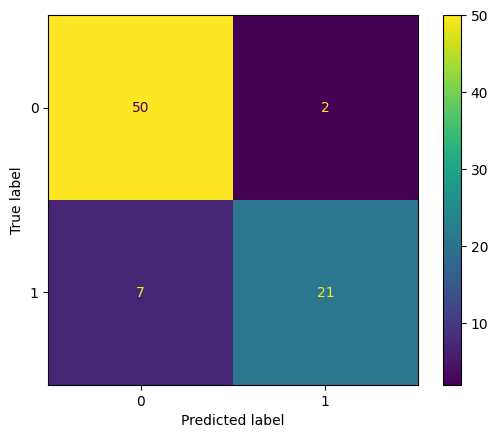

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [10]:
def get_confusion_matrix_values(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    return (conf_matrix[0][0], conf_matrix[0][1],conf_matrix[1][0], conf_matrix[1][1])

TN, FP, FN, TP = get_confusion_matrix_values(y_test, y_pred)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)
print("TP:", TP)


TN: 50
FP: 2
FN: 7
TP: 21


In [13]:
print("The Accuracy is: ", (TP+TN)/(TP+FP+TN+FN))
print("The Precision is: ", (TP/(TP+FP)))
print("The Recall is: ", (TP/(TP+FN)))
print("The F1 Score is: ", (2*precision*recall) / (precision+recall) )

The Accuracy is:  0.8875
The Precision is:  0.9130434782608695
The Recall is:  0.75
The F1 Score is:  0.8235294117647057


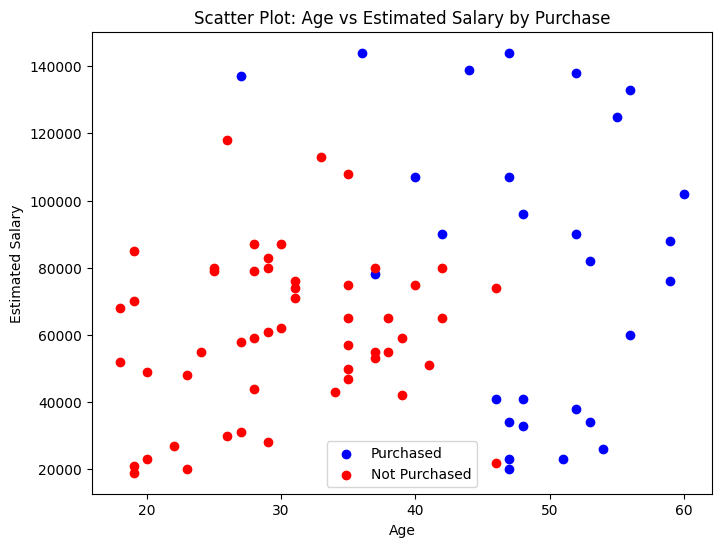

In [12]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot points where purchase was made (Purchased = 1)
plt.scatter(X_test[y_test == 1]['Age'], X_test[y_test == 1]['EstimatedSalary'], color='blue', label='Purchased')

# Plot points where no purchase was made (Purchased = 0)
plt.scatter(X_test[y_test == 0]['Age'], X_test[y_test == 0]['EstimatedSalary'], color='red', label='Not Purchased')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot: Age vs Estimated Salary by Purchase')
plt.legend()
plt.show()